In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [5]:
df=pd.read_csv(r"C:\Users\86130\00.Project\03.Datasets\Merged_SectorType1209.csv")
print(df)

      Unnamed: 0                    SectorType  AvgMaxPower  AvgMinPower  \
0              0  Large industrial electricity  117888.3300   51526.5690   
1              1          business electricity   64027.8582   23758.7970   
2              2              general industry    6179.9364    4093.0467   
3              3              general industry   10711.9704    3971.5308   
4              4          business electricity   75467.2143   20231.6265   
...          ...                           ...          ...          ...   
3605        3605          non-general industry    3316.1904    1434.9684   
3606        3606  Large industrial electricity  101834.8440   74755.6662   
3607        3607          non-general industry    3223.6920    1401.9822   
3608        3608          business electricity   96396.2568   21291.3042   
3609        3609              general industry   10329.5676    3732.4056   

           date  max temperature  min temperature  
0      1/1/2019             12.0   

In [6]:
df = df.drop(columns='Unnamed: 0')
df.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature
0,Large industrial electricity,117888.3300,51526.5690,1/1/2019,12.0,7.0
1,business electricity,64027.8582,23758.7970,1/1/2019,12.0,7.0
2,general industry,6179.9364,4093.0467,1/1/2019,12.0,7.0
3,general industry,10711.9704,3971.5308,1/2/2019,11.0,6.0
4,business electricity,75467.2143,20231.6265,1/2/2019,11.0,6.0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Create one LabelEncoder
label_encoder = LabelEncoder()

# Label-encode the columns that need to be encoded
columns_to_label_encode = ['SectorType']
for col in columns_to_label_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Print the modified DataFrame
print(df)

                        SectorType  AvgMaxPower  AvgMinPower       date  \
0     Large industrial electricity  117888.3300   51526.5690   1/1/2019   
1             business electricity   64027.8582   23758.7970   1/1/2019   
2                 general industry    6179.9364    4093.0467   1/1/2019   
3                 general industry   10711.9704    3971.5308   1/2/2019   
4             business electricity   75467.2143   20231.6265   1/2/2019   
...                            ...          ...          ...        ...   
3605          non-general industry    3316.1904    1434.9684  8/30/2021   
3606  Large industrial electricity  101834.8440   74755.6662  8/31/2021   
3607          non-general industry    3223.6920    1401.9822  8/31/2021   
3608          business electricity   96396.2568   21291.3042  8/31/2021   
3609              general industry   10329.5676    3732.4056  8/31/2021   

      max temperature  min temperature  SectorType_encoded  
0                12.0              7.0

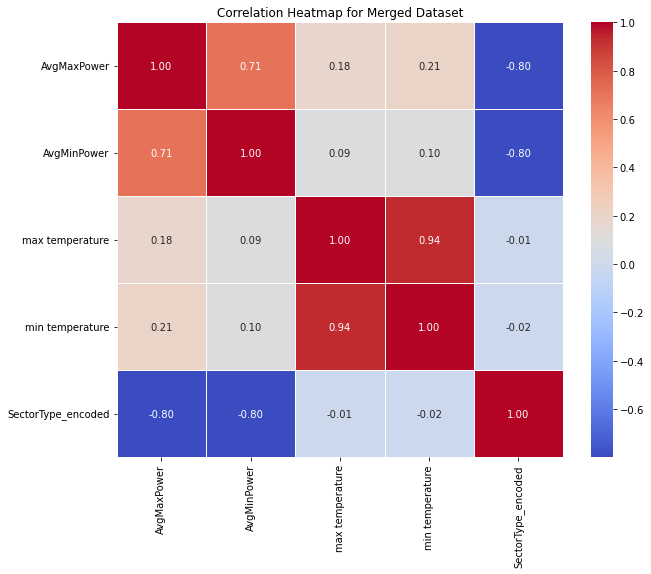

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sectortype' is a column in your DataFrame
#largeindustry_df = df[df['SectorType'] == 'Large industrial electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Merged Dataset')
plt.show()

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Add a column indicating whether it's a weekend
df['is_weekend'] = (df['date'].dt.dayofweek // 5 == 1).astype(int)

# Optional: If you want to check the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

In [8]:
df.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,year,month,day,is_weekend,day_of_week
0,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0,2019,1,1,0,1
1,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0,2019,1,1,0,1
2,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0,2019,1,1,0,1
3,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0,2019,1,2,0,2
4,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0,2019,1,2,0,2


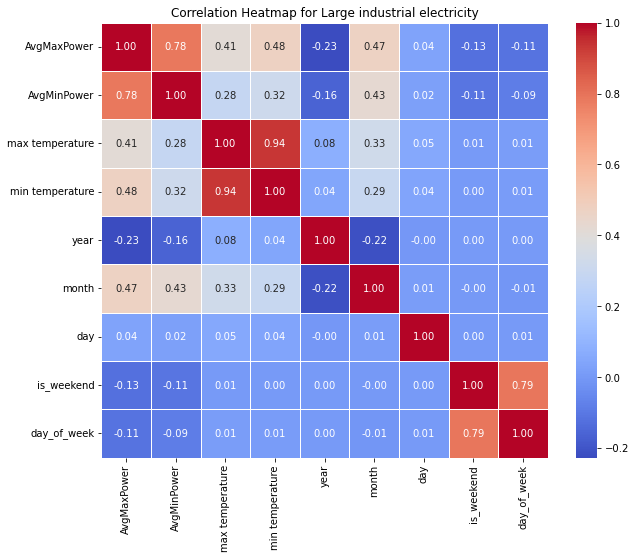

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sectortype' is a column in your DataFrame
largeindustry_df = df[df['SectorType'] == 'Large industrial electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = largeindustry_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Large industrial electricity')
plt.show()

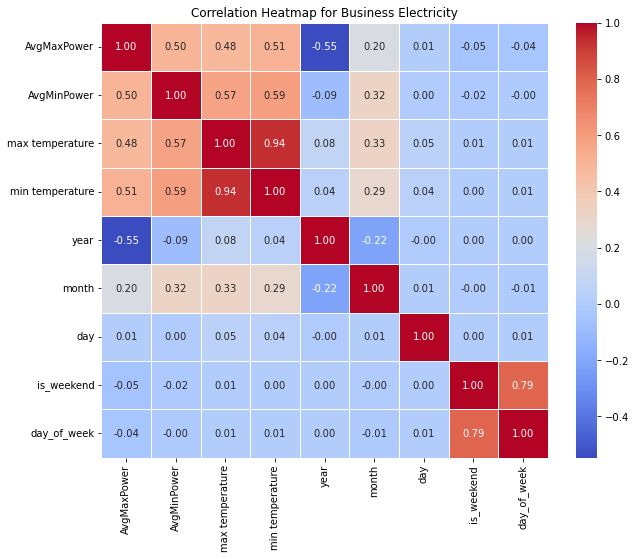

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sectortype' is a column in your DataFrame
business_df = df[df['SectorType'] == 'business electricity']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = business_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Business Electricity')
plt.show()

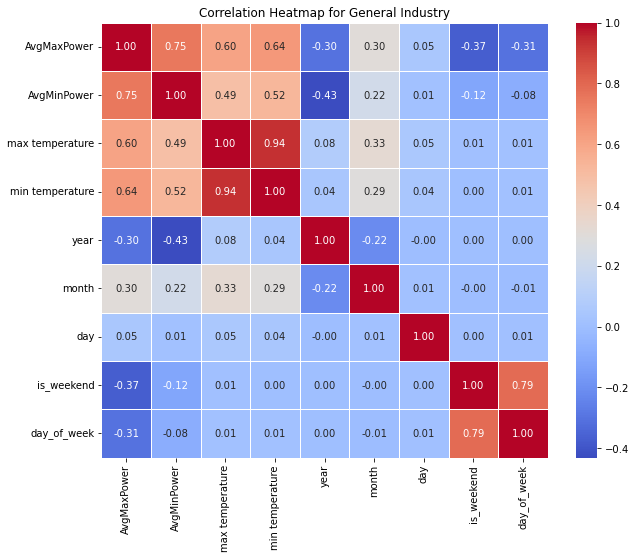

In [10]:
# Assuming 'sectortype' is a column in your DataFrame
general_df = df[df['SectorType'] == 'general industry']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = general_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for General Industry')
plt.show()

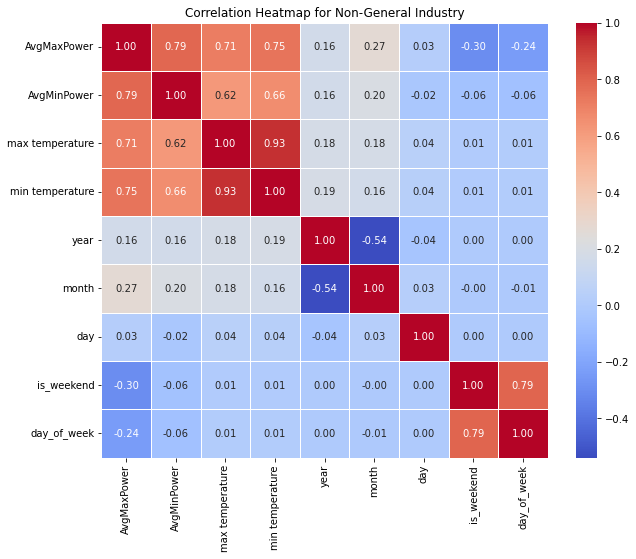

In [11]:
# Assuming 'sectortype' is a column in your DataFrame
nongeneral_df = df[df['SectorType'] == 'non-general industry']

# Calculate the correlation matrix for the 'large industry' sector
correlation_matrix_large = nongeneral_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_large, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap for Non-General Industry')
plt.show()

In [12]:
df.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature,year,month,day,is_weekend,day_of_week
0,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0,2019,1,1,0,1
1,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0,2019,1,1,0,1
2,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0,2019,1,1,0,1
3,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0,2019,1,2,0,2
4,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0,2019,1,2,0,2


In [13]:
df = df.drop(columns=['year','month','day','is_weekend','day_of_week'], axis=1)
df.head()

,SectorType,AvgMaxPower,AvgMinPower,date,max temperature,min temperature
0,Large industrial electricity,117888.3300,51526.5690,2019-01-01,12.0,7.0
1,business electricity,64027.8582,23758.7970,2019-01-01,12.0,7.0
2,general industry,6179.9364,4093.0467,2019-01-01,12.0,7.0
3,general industry,10711.9704,3971.5308,2019-01-02,11.0,6.0
4,business electricity,75467.2143,20231.6265,2019-01-02,11.0,6.0
